# Analysis for RNA-DNA p-brain tissue sample

2021-04-23 smRNA and 04-26 CTP-09 MOP marker gene DNA-MERFISH

by Pu Zheng

2020.04.30

# 0. required packages for h5py

In [1]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

65008


# 1. Create field-of-view class

In [2]:
reload(ia)
reload(classes)
reload(classes.batch_functions)
reload(classes.field_of_view)
reload(io_tools.load)

reload(visual_tools)
reload(ia.correction_tools)
reload(ia.correction_tools.alignment)
reload(ia.spot_tools.matching)
reload(ia.segmentation_tools.chromosome)
reload(ia.spot_tools.fitting)

fov_param = {'data_folder':r'\\10.245.74.158\Chromatin_NAS_5\20210506-P_Forebrain_MERFISH_CTP09',
             'save_folder':r'I:\Pu_Temp\20210506-M1_MERFISH_CTP-09_P_forebrain',
             #'save_folder':r'D:\Pu_Temp\202009_IgH_proB_DMSO_2color',
             'experiment_type': 'DNA',
             'num_threads': 30,
             #'correction_folder':r'\\10.245.74.158\Chromatin_NAS_0\Corrections\20210514-Corrections_2color_50_new_fiber',
             'correction_folder':r'I:\Corrections\20210514-Corrections_2color_50_new_fiber',
             'shared_parameters':{
                     'single_im_size':[50,2048,2048],
                     'corr_channels':['750','647'],
                     'num_empty_frames': 0, 
                     'corr_hot_pixel':True,
                     'corr_Z_shift':False,
                     'corr_bleed':False,
                     'min_num_seeds':250,
                     'max_num_seeds': 2000,
                     'spot_seeding_th': 200,
                     'normalize_intensity_local':False,
                     'normalize_intensity_background':False,
                 }, 
             'ref_id': 2, # special for this experiment
             }

In [3]:
fov_param['ref_id']

2

In [4]:
fov = classes.field_of_view.Field_of_View(fov_param, _fov_id=4,
                                          _color_info_kwargs={
                                              '_color_filename':'Color_Usage',
                                          }, 
                                          _prioritize_saved_attrs=False,
                                          )

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 44
- Number of field of views: 81
- Importing csv file: \\10.245.74.158\Chromatin_NAS_5\20210506-P_Forebrain_MERFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
-- Hyb H0R0 exists in this data
-- DAPI exists in hyb: H0R0
- 41 folders are found according to color-usage annotation.
+ loading fov_info from file: I:\Pu_Temp\20210506-M1_MERFISH_CTP-09_P_forebrain\Conv_zscan_04.hdf5
++ base attributes loaded:['dapi_im', 'ref_im'] in 3.913s.
+ loading correction from file: I:\Pu_Temp\20210506-M1_MERFISH_CTP-09_P_forebrain\Conv_zscan_04.hdf5
++ load chromatic correction profile directly from savefile.
++ load chromatic_constants correction profile directly from savefile.
++ load illumination correction profile directly from savefile.
+ loading segmentation from file: I:\Pu_Temp\20210506-M1_MERFISH_CTP-09_P_forebrain\Conv_zscan_04.hdf5
++ base attributes loaded:[] in 0.001s.
-- saving fov_info 

## 2. Process image into candidate spots

In [27]:
reload(io_tools.load)
reload(spot_tools.fitting)
reload(correction_tools.chromatic)
reload(classes.batch_functions)

# process image into spots
id_list, spot_list = fov._process_image_to_spots('merfish', 
                                                 #_sel_ids=np.arange(41,47),
                                                 _load_common_reference=True,
                                                 _load_with_multiple=False,
                                                 _save_images=True,
                                                 _warp_images=True, 
                                                 _overwrite_drift=False,
                                                 _overwrite_image=False,
                                                 _overwrite_spot=False,
                                                 _verbose=True)

-- No folder selected, allow processing all 41 folders
-- checking merfish, region:[2 1] in 0.004s.
-- checking merfish, region:[4 3] in 0.004s.
-- checking merfish, region:[6 5] in 0.003s.
-- checking merfish, region:[8 7] in 0.004s.
-- checking merfish, region:[10  9] in 0.003s.
-- checking merfish, region:[12 11] in 0.003s.
-- checking merfish, region:[14 13] in 0.003s.
-- checking merfish, region:[16 15] in 0.004s.
-- checking merfish, region:[18 17] in 0.003s.
-- checking merfish, region:[20 19] in 0.003s.
-- checking merfish, region:[22 21] in 0.003s.
+ Start multi-processing of pre-processing for 11 images with 30 threads
++ processed merfish ids: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22] in 980.21s.


In [28]:
reload(io_tools.load)
reload(spot_tools.fitting)
reload(correction_tools.chromatic)
reload(classes.batch_functions)

# process image into spots
id_list, spot_list = fov._process_image_to_spots('combo', 
                                                 #_sel_ids=np.arange(41,47),
                                                 _load_common_reference=True,
                                                 _load_with_multiple=False,
                                                 _save_images=True,
                                                 _warp_images=False, 
                                                 _overwrite_drift=False,
                                                 _overwrite_image=False,
                                                 _overwrite_spot=False,
                                                 _verbose=True)

-- No folder selected, allow processing all 41 folders
-- checking combo, region:[1 2] in 0.004s.
-- checking combo, region:[3 4] in 0.002s.
-- checking combo, region:[5 6] in 0.003s.
-- checking combo, region:[7 8] in 0.003s.
-- checking combo, region:[ 9 10] in 0.002s.
-- checking combo, region:[11 12] in 0.002s.
-- checking combo, region:[13 14] in 0.002s.
-- checking combo, region:[15 16] in 0.003s.
-- checking combo, region:[17 18] in 0.003s.
-- checking combo, region:[19 20] in 0.002s.
-- checking combo, region:[21 22] in 0.003s.
-- checking combo, region:[23 24] in 0.003s.
-- checking combo, region:[25 26] in 0.003s.
-- checking combo, region:[27 28] in 0.002s.
+ Start multi-processing of pre-processing for 14 images with 30 threads
++ processed combo ids: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28] in 590.88s.


In [29]:
reload(io_tools.load)
reload(spot_tools.fitting)
reload(correction_tools.chromatic)
reload(classes.batch_functions)

# process image into spots
id_list, spot_list = fov._process_image_to_spots('unique', 
                                                 #_sel_ids=np.arange(41,47),
                                                 _load_common_reference=True,
                                                 _load_with_multiple=False,
                                                 _save_images=True,
                                                 _warp_images=False, 
                                                 _overwrite_drift=False,
                                                 _overwrite_image=False,
                                                 _overwrite_spot=False,
                                                 _verbose=True)

-- No folder selected, allow processing all 41 folders
-- checking unique, region:[1 2] in 0.005s.
-- checking unique, region:[3 4] in 0.003s.
-- checking unique, region:[63 62] in 0.004s.
-- checking unique, region:[65 64] in 0.003s.
-- checking unique, region:[121 122] in 0.003s.
-- checking unique, region:[123 124] in 0.004s.
-- checking unique, region:[181 182] in 0.003s.
-- checking unique, region:[183 184] in 0.004s.
-- checking unique, region:[203 202] in 0.003s.
-- checking unique, region:[205 204] in 0.003s.
+ Start multi-processing of pre-processing for 10 images with 30 threads
++ processed unique ids: [  1   2   3   4  62  63  64  65 121 122 123 124 181 182 183 184 202 203
 204 205] in 513.79s.


In [91]:
reload(io_tools.load)
reload(spot_tools.fitting)
reload(correction_tools.chromatic)
reload(classes.batch_functions)

# process image into spots
id_list, spot_list = fov._process_image_to_spots('gene', 
                                                 #_sel_ids=np.arange(41,47),
                                                 _load_common_reference=True,
                                                 _load_with_multiple=False,
                                                 _save_images=True,
                                                 _warp_images=True, 
                                                 _overwrite_drift=False,
                                                 _overwrite_image=True,
                                                 _overwrite_spot=True,
                                                 _verbose=True)

-- No folder selected, allow processing all 41 folders
-- checking gene, region:[1 2] in 0.004s.
-- checking gene, region:[3 4] in 0.003s.
-- checking gene, region:[5] in 0.002s.
+ Start multi-processing of pre-processing for 3 images with 30 threads
++ processed gene ids: [1 2 3 4 5] in 661.93s.


In [31]:
dapi_im = fov._load_dapi_image()

-- choose dapi images from folder: \\10.245.74.158\Chromatin_NAS_5\20210506-P_Forebrain_MERFISH_CTP09\H0R0.
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_5\20210506-P_Forebrain_MERFISH_CTP09\H0R0\Conv_zscan_04.dax
-- loading illumination correction profile from file:
	 405 illumination_correction_405_2048x2048.npy
	 488 illumination_correction_488_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_5\20210506-P_Forebrain_MERFISH_CTP09\H0R0\Conv_zscan_04.dax  in 16.066s
-- removing hot pixels for channels:['405', '488'] in 33.484s
-- illumination correction for channels: 405, 488, in 6.450s
-- apply bead_drift calculate for channel: 488
-- start aligning given source image to given reference image.
--- align image 0 in 7.985s.
--- align image 1 in 7.942s.
--- align image 2 in 7.963s.
--- finish drift in 24.270s
-- drift: [-0.78666667 -4.31666667  5.9       ]
-- warp image with drift:[-0.79 -4.32  5.9 ] 405, in 123.184s
-- finish correction in 204.20

In [6]:
visual_tools.imshow_mark_3d_v2([fov.dapi_im])

<IPython.core.display.Javascript object>

# Start from here

In [5]:
fov._load_from_file('unique')
fov._load_from_file('combo')
fov._load_from_file('gene')

+ loading unique from file: I:\Pu_Temp\20210506-M1_MERFISH_CTP-09_P_forebrain\Conv_zscan_04.hdf5
++ finish loading unique in 0.050s. 
+ loading combo from file: I:\Pu_Temp\20210506-M1_MERFISH_CTP-09_P_forebrain\Conv_zscan_04.hdf5
++ finish loading combo in 0.007s. 
+ loading gene from file: I:\Pu_Temp\20210506-M1_MERFISH_CTP-09_P_forebrain\Conv_zscan_04.hdf5
++ finish loading gene in 0.004s. 


E:\Users\puzheng\Documents\ImageAnalysis3\classes\field_of_view.py:1463: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  _spots_list = np.array([_spots[_spots[:,0] > 0] for _flg, _spots in zip(_flags, _grp['spots'][:]) if _flg > 0])


In [7]:
from scipy.spatial.distance import cdist
_rid = 1
int_th = 200
dist_th = 1000
unique_spots = fov.unique_spots_list[_rid]
unique_spots = unique_spots[unique_spots[:,0] > int_th]
combo_spots = fov.combo_spots_list[_rid]
combo_spots = combo_spots[combo_spots[:,0] > int_th]

unique_hzxys = spot_tools.picking.convert_spots_to_hzxys(unique_spots, fov.shared_parameters['distance_zxy'])
combo_hzxys = spot_tools.picking.convert_spots_to_hzxys(combo_spots, fov.shared_parameters['distance_zxy'])

kept_uinds = np.where(cdist(unique_hzxys, combo_hzxys).min(1) < dist_th)[0]
kept_cinds = np.where(cdist(unique_hzxys, combo_hzxys).min(0) < dist_th)[0]


In [8]:
from scipy.spatial.distance import cdist
int_th = 200
dist_th = 1000
# select spots that has neighborhood spots
gene_id = 1
gene_unique_rids = np.arange(gene_id*4, gene_id*4+4)
print(gene_unique_rids)
gene_spots_list = fov.unique_spots_list[gene_unique_rids]
gene_hzxys_list = [np.array(spot_tools.picking.convert_spots_to_hzxys(_spots, fov.shared_parameters['distance_zxy']))
                   for _spots in gene_spots_list]
kept_gene_flags = []
kept_gene_hzxys_list = []
kept_gene_spots_list = []
for _i, _hzxys in enumerate(gene_hzxys_list):
    _kept_flags = np.sum([cdist(_hzxys, _ref_hzxys).min(1) < dist_th 
                  for _j, _ref_hzxys in enumerate(gene_hzxys_list) if _i != _j], axis=0) > 0 # number of neighbors for each spot
    kept_gene_hzxys_list.append(_hzxys[_kept_flags])
    kept_gene_spots_list.append(gene_spots_list[_i][_kept_flags])
    kept_gene_flags.append(_kept_flags)

[4 5 6 7]


In [9]:
with h5py.File(fov.save_filename, "r", libver='latest') as _f:
    _grp = _f['gene']
    gene_ims = _grp['ims'][:]
    gene_ids = _grp['ids'][:]
        #gene_raw_spot_list.append(_grp['raw_spots'][_ind])

In [19]:
plt.figure(figsize=(4,4), dpi=150)
plt.gca().invert_yaxis()
#plt.imshow(masks_2d)
plt.imshow(gene_ims[gene_id].max(0), vmin=500, vmax=2000)


<IPython.core.display.Javascript object>

In [18]:
for _spots in gene_spots_list:
    for _spot in _spots:
        local_crop = io_tools.crop.crop_neighboring_area(
            gene_ims[gene_id], _spot[1:4], 9,
        )

[  28.634918 1031.2673   1429.3269  ]
[  42.349308 1331.8794    833.82184 ]
[  26.02119 1505.051    729.7313 ]
[   8.018301 1672.8274   1682.0608  ]
[  45.24716 1607.0664  1410.2648 ]
[ 37.497044 190.8725   762.87616 ]
[  41.91265  865.61945 1651.6703 ]
[  44.47598 1301.4545  1005.71857]
[  32.886993 1639.853     360.35236 ]
[ 41.709007 686.58527  397.861   ]
[  24.685404 1076.4888   1345.6421  ]
[ 14.453189 411.3225   270.90308 ]
[ 19.604942 879.9195   711.2252  ]
[ 29.679213 994.7706   169.24217 ]
[  41.13469 1053.4125  1357.987  ]
[ 39.85697 288.89297 909.53   ]
[ 43.899918 918.1015   398.38412 ]
[   4.137093  746.7804   1970.9718  ]
[  22.802958 1119.384     637.6546  ]
[  22.805979 1871.5651    175.2249  ]
[  38.705105  485.49326  1077.6047  ]
[   5.8342876 1594.1561    1503.4537   ]
[  41.72373 1905.9243   832.8924 ]
[  34.533245 1054.2313    367.30463 ]
[  16.158436  711.3626   1337.6298  ]
[  13.785858 1036.57     1040.5596  ]
[  44.821884 1115.566     983.37134 ]
[  13.053419 

ValueError: zero-size array to reduction operation minimum which has no identity

<IPython.core.display.Javascript object>


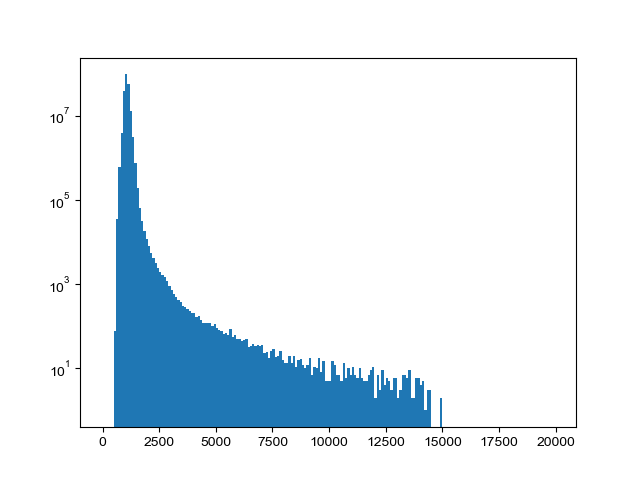

In [14]:
plt.figure()
plt.hist(np.ravel(gene_ims[gene_id]), bins=np.arange(0,20000,100))
plt.yscale('log')
plt.show()

<IPython.core.display.Javascript object>


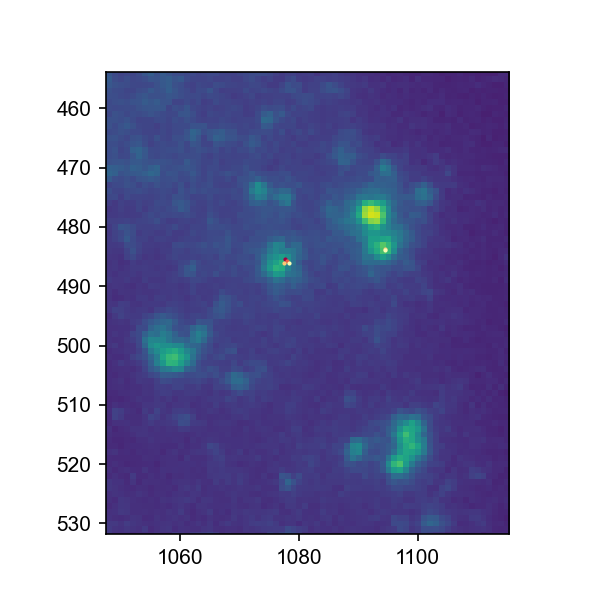

0
1
2
3


In [15]:
from matplotlib.cm import Spectral

plt.figure(figsize=(4,4), dpi=150)
plt.gca().invert_yaxis()
#plt.imshow(masks_2d)
plt.imshow(gene_ims[gene_id].max(0), vmin=1000, vmax=3000)

#for _rid, _uspots in enumerate(fov.unique_spots_list):
for _i, _rid in enumerate(gene_unique_rids):
    print(_i)
    _uspots = kept_gene_spots_list[_i]
    #_uspots = gene_spots_list[_i]
    plt.plot(_uspots[:,3], _uspots[:,2], '.', markersize=2, 
             color=Spectral(_i/len(gene_unique_rids) * 0.7) )

plt.show()

In [23]:
intensity_th = 500

kept_raw_spots = []

with h5py.File(fov.save_filename, "r", libver='latest') as _f:
    _grp = _f['unique']
    gene_unique_ims = _grp['ims'][gene_unique_rids]
    for _i, _rid in enumerate(gene_unique_rids):
        print(len(kept_gene_flags[_i]), len(_grp['raw_spots'][_rid]))
        kept_raw_spots.append(_grp['raw_spots'][_rid][np.where(kept_gene_flags[_i])[0]])

291 2000
271 2000
306 2000
280 2000


In [27]:
gene_unique_ims

array([[[[ 911, 1043,  994, ...,  790,  826,  730],
         [1025, 1061, 1020, ...,  836,  854,  746],
         [ 906, 1116, 1112, ...,  837,  771,  807],
         ...,
         [1036, 1008, 1033, ...,  741,  758,  803],
         [ 955,  959, 1024, ...,  836,  753,  819],
         [ 991,  952,  912, ...,  776,  813,  797]],

        [[ 869,  935,  967, ...,  680,  839,  809],
         [ 919, 1125, 1055, ...,  828,  848,  789],
         [ 990, 1065, 1028, ...,  923,  836,  862],
         ...,
         [ 902,  937, 1042, ...,  909,  761,  760],
         [ 869,  989, 1030, ...,  812,  778,  788],
         [ 906,  916, 1046, ...,  808,  710,  745]],

        [[ 836, 1069,  924, ...,  849,  809,  870],
         [1027, 1248, 1178, ...,  842,  931,  717],
         [1111, 1130, 1052, ...,  902,  883,  853],
         ...,
         [1060, 1062,  999, ...,  902,  778,  743],
         [ 991,  960, 1007, ...,  805,  896,  851],
         [ 946,  986,  986, ...,  852,  769,  692]],

        ...,

  

In [26]:
len(gene_unique_ims + [gene_ims[gene_id]])

4

<IPython.core.display.Javascript object>


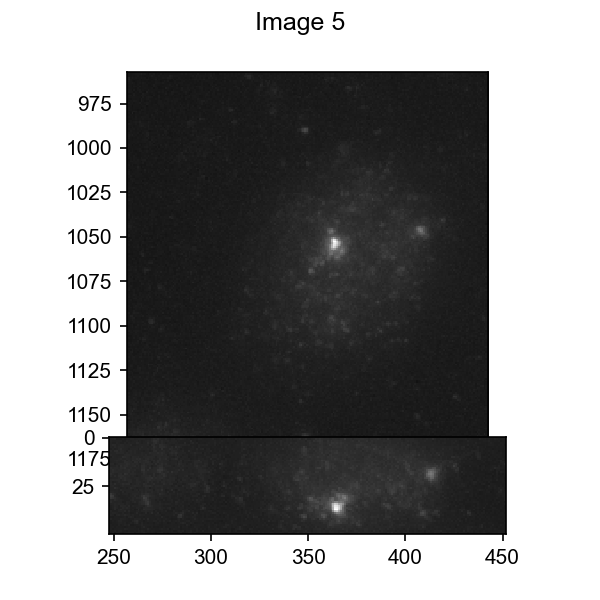

In [35]:
# visualize_all_chromosomes
%matplotlib notebook
%matplotlib notebook

## visualize
coord_dict = {'coords':[],
              'class_ids':[],
             }
for _i, _spots in enumerate(kept_raw_spots):
    _sel_spots = _spots
    coord_dict['coords'] += list(np.flipud(_spot[1:4]) for _spot in _sel_spots)
    coord_dict['class_ids'] += list(_i * np.ones(len(_sel_spots),dtype=np.int))

fig=plt.figure(figsize=(4,4), dpi=150)    
    
visual_tools.imshow_mark_3d_v2(list(gene_unique_ims) + [gene_ims[gene_id]], 
                               fig=fig,
                               given_dic=coord_dict,
                               save_file=None,
                               )

<IPython.core.display.Javascript object>


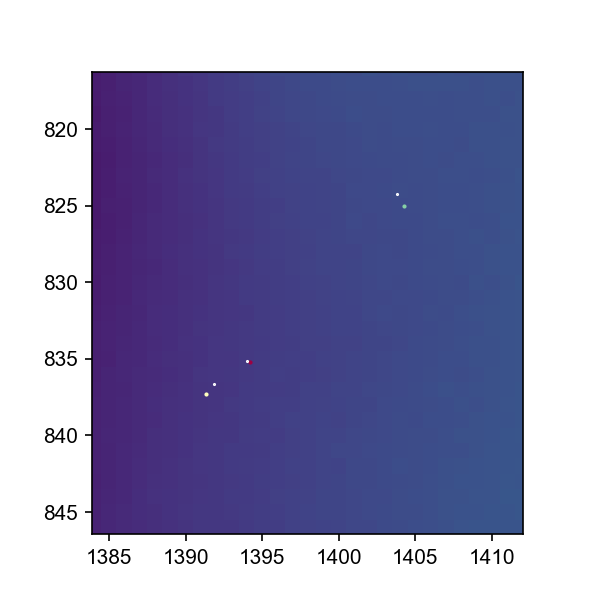

In [50]:
from matplotlib.cm import Spectral
int_th = 200

selected_rids = [0,1,2,3]

plt.figure(figsize=(4,4), dpi=150)
plt.gca().invert_yaxis()
#plt.imshow(masks_2d)
plt.imshow(fov.dapi_im.mean(0), vmin=1000, vmax=5000)

#for _rid, _uspots in enumerate(fov.unique_spots_list):
for _rid in selected_rids:
    _uspots = fov.unique_spots_list[_rid]
    
    unique_spots = fov.unique_spots_list[_rid]
    unique_spots = unique_spots[unique_spots[:,0] > int_th]
    combo_spots = fov.combo_spots_list[_rid]
    combo_spots = combo_spots[combo_spots[:,0] > int_th]

    unique_hzxys = spot_tools.picking.convert_spots_to_hzxys(unique_spots, fov.shared_parameters['distance_zxy'])
    combo_hzxys = spot_tools.picking.convert_spots_to_hzxys(combo_spots, fov.shared_parameters['distance_zxy'])

    kept_uinds = np.where(cdist(unique_hzxys, combo_hzxys).min(1) < 500)[0]
    kept_cinds = np.where(cdist(unique_hzxys, combo_hzxys).min(0) < 500)[0]

    _filtered_uspots = unique_spots[kept_uinds]
    _filtered_cspots = combo_spots[kept_cinds]
    #_filtered_uspots = _uspots[_uspots[:,0] > int_th]
    plt.plot(_filtered_uspots[:,3], _filtered_uspots[:,2], '.', markersize=2, 
             color=Spectral(_rid/len(selected_rids)) )
    plt.plot(_filtered_cspots[:,3], _filtered_cspots[:,2], '.', markersize=1, 
             color=[1,1,1])
    #break
plt.show()

<IPython.core.display.Javascript object>


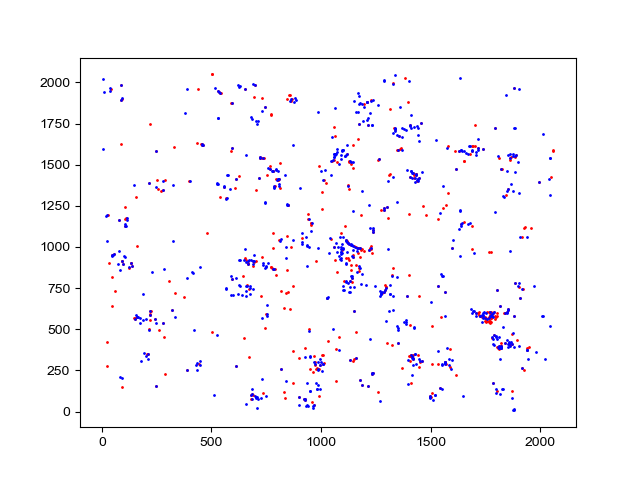

In [31]:
plt.figure()
plt.plot(unique_spots[:,2], unique_spots[:,3], 'r.', markersize=2)
plt.plot(combo_spots[:,2], combo_spots[:,3], 'b.', markersize=2)
plt.show()

In [ ]:
vis_unique_inds = [0,1,2,3,4]
vis_unique_ims, vis_unique_ids, vis_unique_spot_list, vis_unique_raw_spot_list = [], [], [], []

with h5py.File(fov.save_filename, "r", libver='latest') as _f:
    _grp = _f['unique']
    
    for _ind in vis_unique_inds:
        vis_unique_ims.append(_grp['ims'][_ind])
        vis_unique_ids.append(_grp['ids'][_ind])
        #_picked_inds = picked_spot_inds_list[_ind]
        #_picked_inds = np.array(_picked_inds[np.isnan(_picked_inds)==False], dtype=np.int)
        #vis_spot_list.append(raw_spots_list[_ind][_picked_inds])
        vis_unique_raw_spot_list.append(_grp['raw_spots'][_ind])

In [35]:
intensity_th = 500
vis_unique_inds = [0,1,2,3,4]
vis_unique_ims, vis_unique_ids, vis_unique_spot_list, vis_unique_raw_spot_list = [], [], [], []

with h5py.File(fov.save_filename, "r", libver='latest') as _f:
    _grp = _f['unique']
    
    for _ind in vis_unique_inds:
        vis_unique_ims.append(_grp['ims'][_ind])
        vis_unique_ids.append(_grp['ids'][_ind])
        #_picked_inds = picked_spot_inds_list[_ind]
        #_picked_inds = np.array(_picked_inds[np.isnan(_picked_inds)==False], dtype=np.int)
        #vis_spot_list.append(raw_spots_list[_ind][_picked_inds])
        vis_unique_raw_spot_list.append(_grp['raw_spots'][_ind][_grp['raw_spots'][_ind][:,0] > intensity_th])

<IPython.core.display.Javascript object>


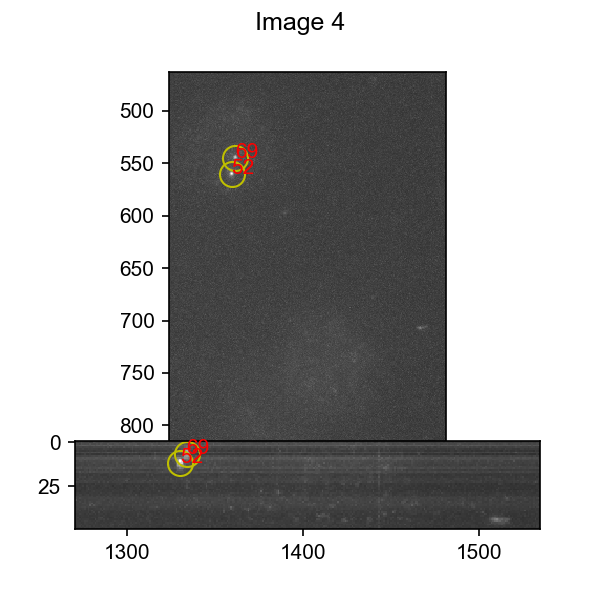

In [36]:
# visualize_all_chromosomes
%matplotlib notebook
%matplotlib notebook

## visualize
coord_dict = {'coords':[],
              'class_ids':[],
             }
for _i, _spots in enumerate(vis_unique_raw_spot_list):
    _sel_spots = _spots[_spots[:,0] > 200]
    coord_dict['coords'] += list(np.flipud(_spot[1:4]) for _spot in _sel_spots)
    coord_dict['class_ids'] += list(_i * np.ones(len(_sel_spots),dtype=np.int))

fig=plt.figure(figsize=(4,4), dpi=150)    
    
visual_tools.imshow_mark_3d_v2(vis_unique_ims, 
                               fig=fig,
                               given_dic=coord_dict,
                               save_file=None,
                               )

In [38]:
vis_combo_inds = [0,1,2,3,4]
vis_combo_ims, vis_combo_ids, vis_combo_spot_list, vis_combo_raw_spot_list = [], [], [], []

with h5py.File(fov.save_filename, "r", libver='latest') as _f:
    _grp = _f['combo']
    
    for _ind in vis_combo_inds:
        vis_combo_ims.append(_grp['ims'][_ind])
        vis_combo_ids.append(_grp['ids'][_ind])
        #_picked_inds = picked_spot_inds_list[_ind]
        #_picked_inds = np.array(_picked_inds[np.isnan(_picked_inds)==False], dtype=np.int)
        #vis_spot_list.append(raw_spots_list[_ind][_picked_inds])
        vis_combo_raw_spot_list.append(_grp['raw_spots'][_ind])

<IPython.core.display.Javascript object>


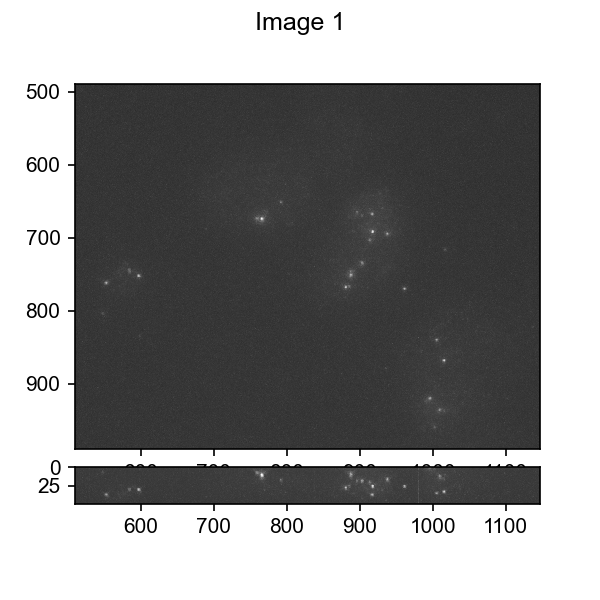

In [45]:
# visualize_all_chromosomes
%matplotlib notebook
%matplotlib notebook

## visualize
coord_dict = {'coords':[],
              'class_ids':[],
             }
for _i, _spots in enumerate(vis_combo_raw_spot_list):
    _sel_spots = _spots[_spots[:,0] > 200]
    coord_dict['coords'] += list(np.flipud(_spot[1:4]) for _spot in _sel_spots)
    coord_dict['class_ids'] += list(_i * np.ones(len(_sel_spots),dtype=np.int))

fig=plt.figure(figsize=(4,4), dpi=150)    
    
visual_tools.imshow_mark_3d_v2(vis_combo_ims, 
                               fig=fig,
                               #given_dic=coord_dict,
                               save_file=None,
                               )

In [42]:
vis_merfish_inds = np.arange(0,11)
vis_merfish_ims, vis_merfish_ids, vis_merfish_spot_list, vis_merfish_raw_spot_list = [], [], [], []

with h5py.File(fov.save_filename, "r", libver='latest') as _f:
    _grp = _f['merfish']
    
    for _ind in vis_merfish_inds:
        vis_merfish_ims.append(_grp['ims'][_ind])
        vis_merfish_ids.append(_grp['ids'][_ind])
        #_picked_inds = picked_spot_inds_list[_ind]
        #_picked_inds = np.array(_picked_inds[np.isnan(_picked_inds)==False], dtype=np.int)
        #vis_spot_list.append(raw_spots_list[_ind][_picked_inds])
        vis_merfish_raw_spot_list.append(_grp['raw_spots'][_ind])

<IPython.core.display.Javascript object>


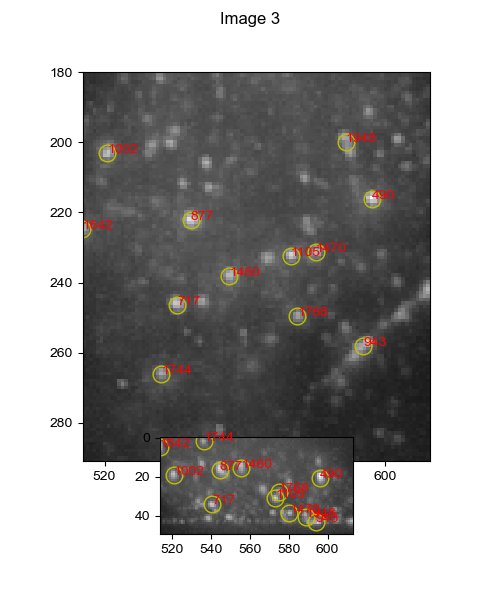

In [49]:
# visualize_all_chromosomes
%matplotlib notebook
%matplotlib notebook

## visualize
coord_dict = {'coords':[],
              'class_ids':[],
             }
for _i, _spots in enumerate(vis_merfish_raw_spot_list):
    _sel_spots = _spots
    coord_dict['coords'] += list(np.flipud(_spot[1:4]) for _spot in _sel_spots)
    coord_dict['class_ids'] += list(_i * np.ones(len(_sel_spots),dtype=np.int))

fig=plt.figure(figsize=(5,6), dpi=100)    
    
visual_tools.imshow_mark_3d_v2(vis_merfish_ims, 
                               fig=fig,
                               given_dic=coord_dict,
                               save_file=None,
                               )

In [35]:
classes.batch_functions._color_dic_stat(fov.color_dic, fov.channels, fov.shared_parameters['allowed_data_types']).keys()

dict_keys(['combo', 'unique', 'gene'])

In [51]:
vis_gene_inds = [0,1,2,3,4]
vis_gene_ims, vis_gene_ids, vis_gene_spot_list, vis_gene_raw_spot_list = [], [], [], []

with h5py.File(fov.save_filename, "r", libver='latest') as _f:
    _grp = _f['gene']
    
    for _ind in vis_gene_inds:
        vis_gene_ims.append(_grp['ims'][_ind])
        vis_gene_ids.append(_grp['ids'][_ind])
        #_picked_inds = picked_spot_inds_list[_ind]
        #_picked_inds = np.array(_picked_inds[np.isnan(_picked_inds)==False], dtype=np.int)
        #vis_spot_list.append(raw_spots_list[_ind][_picked_inds])
        vis_gene_raw_spot_list.append(_grp['raw_spots'][_ind])

<IPython.core.display.Javascript object>


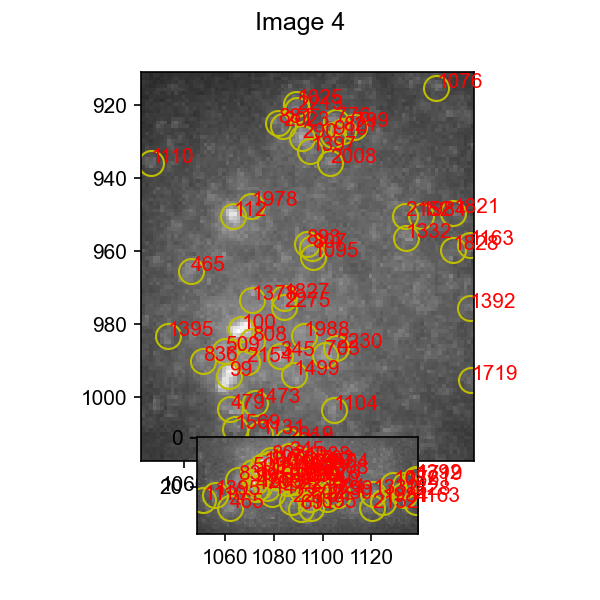

In [52]:
# visualize_all_chromosomes
%matplotlib notebook
%matplotlib notebook

## visualize
coord_dict = {'coords':[],
              'class_ids':[],
             }
for _i, _spots in enumerate(vis_gene_raw_spot_list):
    _sel_spots = _spots[_spots[:,0] > 200]
    coord_dict['coords'] += list(np.flipud(_spot[1:4]) for _spot in _sel_spots)
    coord_dict['class_ids'] += list(_i * np.ones(len(_sel_spots),dtype=np.int))

fig=plt.figure(figsize=(4,4), dpi=150)    
    
visual_tools.imshow_mark_3d_v2(vis_gene_ims, 
                               fig=fig,
                               given_dic=coord_dict,
                               save_file=None,
                               )

## Segmentation by Cellpose

In [7]:
import cv2
from cellpose import utils
from cellpose import models

In [8]:
model = models.Cellpose(gpu=True, model_type='nuclei')

** TORCH CUDA version installed and working. **
>>>> using GPU


In [9]:
dapi_im = fov._load_dapi_image()

directly return existing attribute.


<IPython.core.display.Javascript object>


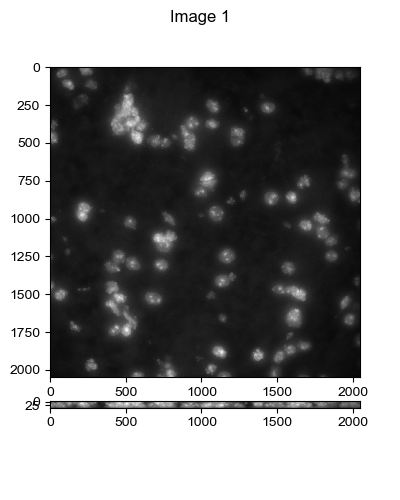

In [10]:
visual_tools.imshow_mark_3d_v2([dapi_im], )

In [51]:
# 2D segmentation
import cellpose
from cellpose import models
model_2d = models.Cellpose(gpu=True, model_type='nuclei')
masks_2d, flows_2d, styles_2d, diams_2d = model_2d.eval(fov.dapi_im[5:-5].max(0), 
                                                        diameter=60, channels=[0,0], 
                                                        min_size=20,
                                                        do_3D=False)

ModuleNotFoundError: No module named 'cellpose'

In [55]:
from skimage.segmentation import find_boundaries

In [57]:
find_boundaries(masks_2d)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

<IPython.core.display.Javascript object>


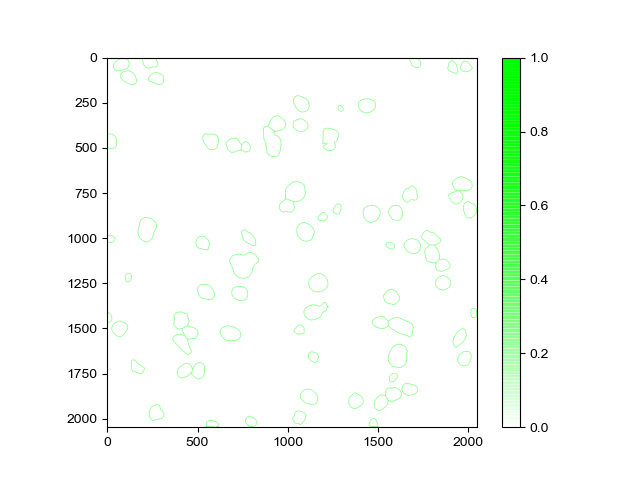

In [75]:
plt.figure()
plt.imshow(find_boundaries(masks_2d), cmap=figure_tools.color.transparent_gradient([0,1,0])
)
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


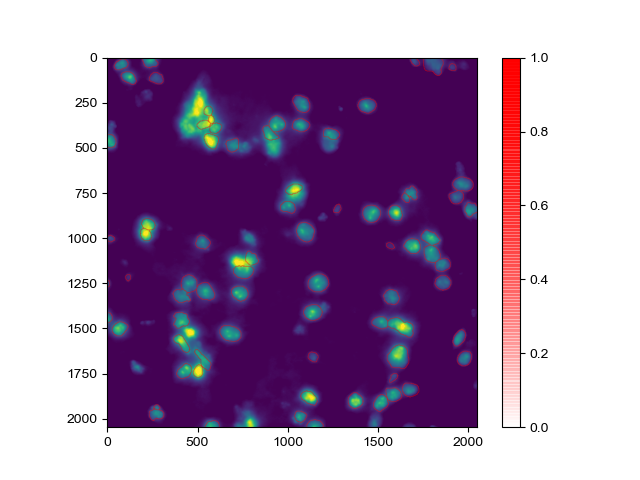

In [88]:
plt.figure()
plt.imshow(fov.dapi_im.mean(0), vmin=1000, vmax=5000)
plt.imshow(find_boundaries(masks_2d), cmap=figure_tools.color.transparent_gradient([1,0,0]))
plt.colorbar()
plt.show()

In [54]:
flows_2d

[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 array([[[-1.2696758e-03, -2.1507517e-03,  4.8279762e-06, ...,
          -9.3707815e-04,  8.8630628e-04,  3.4075491e-03],
         [-8.8315830e-04, -2

<IPython.core.display.Javascript object>


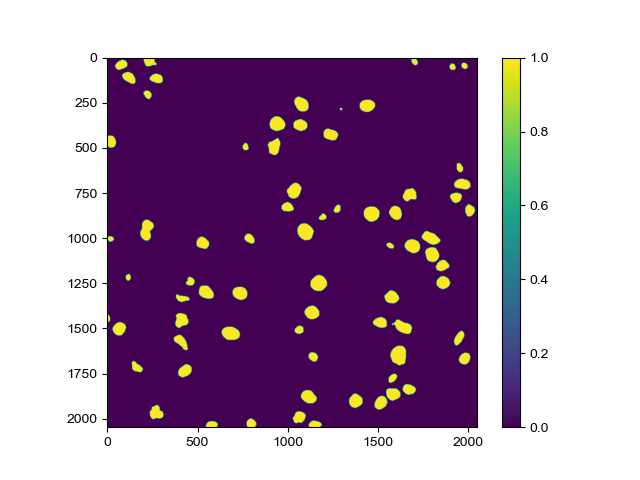

In [70]:
plt.figure()
plt.imshow(masks_2d>0)
plt.colorbar()
plt.show()

In [10]:
# test 3D segmentation
from cellpose import models
model_3d = models.Cellpose(gpu=False, model_type='nuclei')
masks_3d, flows_3d, styles_3d, diams_3d = model.eval(fov.dapi_im[10:30], diameter=50, channels=[0,0], do_3D=True)

>>>> using CPU
Running test snippet to check if MKL-DNN working
see https://pytorch.org/docs/stable/backends.html?highlight=mkl
** MKL version working - CPU version is sped up. **
processing 1 image(s)
multi-stack tiff read in as having 20 planes 1 channels

 running YX: 20 planes of size (2048, 2048) 




100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [01:32<00:00,  9.23s/it]



 running ZY: 2048 planes of size (20, 2048) 




100%|████████████████████████████████████████████████████████████████████████████████| 256/256 [06:21<00:00,  1.49s/it]



 running ZX: 2048 planes of size (20, 2048) 




100%|████████████████████████████████████████████████████████████████████████████████| 256/256 [06:08<00:00,  1.44s/it]


flows computed 3399.48s
dynamics computed 3416.00s
masks computed 3457.83s
estimated masks for 1 image(s) in 3554.92 sec
>>>> TOTAL TIME 3554.92 sec


In [11]:
masks.shape

(20, 2048, 2048)

In [9]:
import torch
torch.cuda.empty_cache()

In [36]:
del(model)

<IPython.core.display.Javascript object>


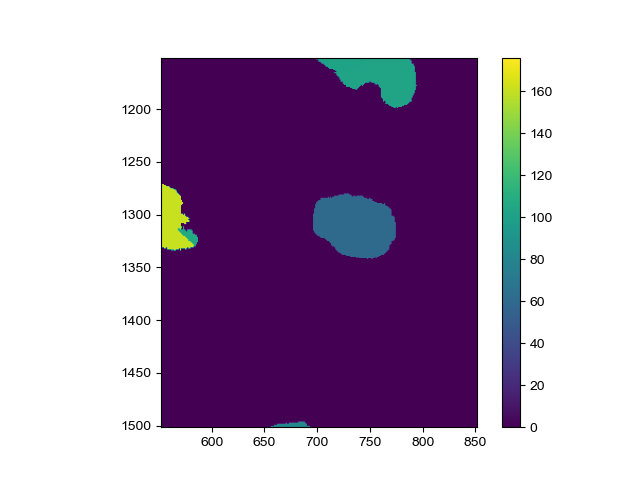

In [13]:
plt.figure()
plt.imshow(masks[10])
plt.colorbar()
plt.show()

In [ ]:
cellposeOutline

In [53]:
import imagedisplay as imdis 

ModuleNotFoundError: No module named 'imagedisplay'

In [ ]:
cellposeOutline = imdis.getMaskBoundaries(masks_cyto)
